Derick Hanscom

Dr. Ryan White

Homework #2

In [ ]:
# Library used to process and organzie data
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
# Librarys used for regression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
import copy
from sklearn.gaussian_process.kernels import RBF
# Library used to calculate performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Librarys used for Lasso
from ssl import PROTOCOL_TLS_CLIENT
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets

##**Problem #1: Data Processing**

After reading the Processed S&P csv, due to the indicators used, there were a lot N/A values. These values were dropped since the models require numeric input. Next important column headers were recorded for problems #4, 5, and 6. After that the data was normalized excluding the target data and dropped data. The columns labeled Date, Name, and Close were then dropped from the data set and intialized as the matrix of datapoints. The last step was to intialize the organization of the data in regards to appropriately splitting the time series.[link text](https://)

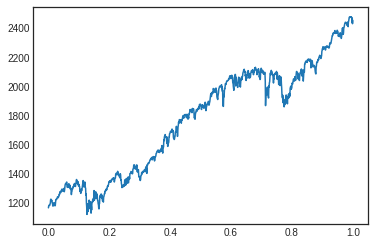

In [ ]:
data = pd.read_csv('Processed_S&P.csv')

# Drops all columns with NA features and resets the index
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

# Converts numerical dates into the name of its day
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.day_name()

# Initializes the dataset for problem #1, #2, #3, and #4
data1 = data

# Initializes the dataset for problems #5 and #6
data_2 = data

# Creates a list of headers for LASSO regression legend
headers = []

# Creates a list of headers for data to drop in problem #5 and #6
headers2 = []

# Used for testing purposes and kernel regression
headers3 = []

for col in data1.columns:
  if (col != 'Date' and col != 'Name' and col != 'Close'):
      headers.append(col)
  if (col != 'EMA_10' and col != 'Close' and col != 'ROC_10' and col != 'ROC_5' and col != 'ROC_15' and col != 'DJI'):
    headers2.append(col)
  if (col != 'EMA_10' and col != 'Close'):
    headers3.append(col)

# Sets target to the closing price of the S&P
y = data1['Close'].to_numpy().reshape(-1,1)

# Plots the closing prices
w = np.linspace(0,1,len(data['Close']))
plt.plot(w,y)


# Removed Close price since target y (closing prices) was set
# Removed dates since it was not numerical
# Removed Name column because all data points have the same feature
data1 = data1.drop(columns = ['Close','Date','Name'])

# Assign the input to the processed data set
X = data1.astype(float).to_numpy()

##**Problem #2:  Kernal Ridge Regression**
The data was split into testing and training sets. I used two different methods, Time series splitting and random splitting. In conclusion the random test split was yielded better results than the time series splitting. This seems counter intuitive since sequence is important in time series, especially stock data. I think that this outcome is a result of the information contained within each window. The splitting method acts as a window that grows as it iterates. This means that the trends present in the training will not necessarly represent the trends in the testing depending on when the market moves within the window. After this I decided to vary the alpha values (Regularization strength) ranging from 0 to 1 to determine which alpha was best. To conclude smaller alphas result in a more accurate prediction and as alpha grows the accuracy in the prediction drastically decreases, the alpha that performed the best was an alpha of zero. Another experiment I tested was to use the polynomial kernal and change the degree of the polynomial to determine which degree (degrees ranging from 1 through 6) best fits our data. The polynomial that fits best is the polynomial of degree 2 while the degree 1 polynomial is the second best choice. At this point I decided to try different kernels ranging from rbf, linear, polynomial, laplacian, sigmoid, and cosine. It appears that the linear kernel fit best (Spoiler Alert) most likely because the linearity observed in the most important feature, that being EMA_10,  This also lines up with the previous test where the linear polynomial incredibly well. This model experiences singular matrix problems but seems to be relatively unaffected at producing good coefficients.

In [ ]:
# Randomly split the data with a 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Created a linspace between 0 and 2 so that the alpha values could be iterated over
h = np.linspace(0,2,20)
print("Random Splitting with increasing alpha")

# Loops through the alpha values and performs regression
for i in h:
  model = KernelRidge(alpha = i)
  
  # Fits the model
  model.fit(trainX,trainY)

  # Computes training and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)

  print(f"\n")
  print("Alpha = ", i)
  print(f"\n")

  print("Training Metrics")
  # print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  # print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

Random Splitting with increasing alpha


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "




Alpha =  0.0


Training Metrics
The r^2 score is 0.9999238536643069
The mean squared error on the training set is 10.926201385580692
The mean absolute error on the training set is 2.5129668473011373


Testing Metrics
The r^2 score is 0.9998742478008426
The mean squared error on the test set is 17.595441356502278
The mean absolute error on the test set is 2.962014226422362


Alpha =  0.10526315789473684


Training Metrics
The r^2 score is 0.9998629748552246
The mean squared error on the training set is 19.661672660624077
The mean absolute error on the training set is 3.279524416369103


Testing Metrics
The r^2 score is 0.9997676306352385
The mean squared error on the test set is 32.51347935146184
The mean absolute error on the test set is 3.9604675421531206


Alpha =  0.21052631578947367


Training Metrics
The r^2 score is 0.9998504889783386
The mean squared error on the training set is 21.45326517903035
The mean absolute error on the training set is 3.417809448768958


Testing Metric

In [ ]:
# Calls the Time Series Split class for splitting the data into 5 chunks
# Acts as a growing window
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
tss = TimeSeriesSplit(n_splits=5, test_size=2)

print("Time Series Split with constant alpha")
set_num = 1

# Loops through each set of chunked data
for train_index, test_index in tss.split(X):
  trainX, testX = X[train_index], X[test_index]
  trainY, testY = y[train_index].ravel(), y[test_index].ravel()

  # Initializes the Kernel Ridge regression and fits the data for each iteration
  model = KernelRidge(alpha = 0)
  model.fit(trainX,trainY)

  # Computes training and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)

  print(f"\n")
  print("Set #",set_num)
  print(f"\n")

  print("Training Metrics")
  # print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  # print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  set_num +=1

Time Series Split with constant alpha


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "




Set # 1


Training Metrics
The r^2 score is 0.9999173769646839
The mean squared error on the training set is 11.549915318059185
The mean absolute error on the training set is 2.568023788368999


Testing Metrics
The r^2 score is -18.268274384182252
The mean squared error on the test set is 4.167859693507552
The mean absolute error on the test set is 1.9676511328125343


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "




Set # 2


Training Metrics
The r^2 score is 0.9999176743802338
The mean squared error on the training set is 11.562485153926154
The mean absolute error on the training set is 2.5687377473246076


Testing Metrics
The r^2 score is -0.32946552313481514
The mean squared error on the test set is 9.728293485365137
The mean absolute error on the test set is 2.5836794335937157


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "




Set # 3


Training Metrics
The r^2 score is 0.999918296574954
The mean squared error on the training set is 11.528161737990082
The mean absolute error on the training set is 2.5657294608387864


Testing Metrics
The r^2 score is -64.41662716968487
The mean squared error on the test set is 13.243982285671592
The mean absolute error on the test set is 3.369872750000013


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "




Set # 4


Training Metrics
The r^2 score is 0.9999185027136206
The mean squared error on the training set is 11.551466597615601
The mean absolute error on the training set is 2.571671323937219


Testing Metrics
The r^2 score is 0.6589974524929972
The mean squared error on the test set is 76.21566618226127
The mean absolute error on the test set is 6.596435304687475


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "




Set # 5


Training Metrics
The r^2 score is 0.9999181000099385
The mean squared error on the training set is 11.656424072992868
The mean absolute error on the training set is 2.578550155926821


Testing Metrics
The r^2 score is 0.39551752701626686
The mean squared error on the test set is 76.50481298700373
The mean absolute error on the test set is 7.072021484375


In [ ]:
# Randomly split the data with a 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Loops through the degrees of the polynomial and performs Kernel Ridge Regression
for i in range(1, 7):
  print("Degree = ", i)
  model = KernelRidge(alpha = 0.0001, kernel = 'polynomial', degree = i)

  # Fits the model
  model.fit(trainX,trainY)

  # Computes training and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)
  print("Training Metrics")
  # print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  # print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  print(f'\n')

Degree =  1
Training Metrics
The r^2 score is 0.9999128890186038
The mean squared error on the training set is 12.499513167203448
The mean absolute error on the training set is 2.6660154555846973


Testing Metrics
The r^2 score is 0.9998454650224252
The mean squared error on the test set is 21.622772036295718
The mean absolute error on the test set is 3.255683577973093


Degree =  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Training Metrics
The r^2 score is 0.9999933551696089
The mean squared error on the training set is 0.9534635431364229
The mean absolute error on the training set is 0.7531687608550796


Testing Metrics
The r^2 score is 0.9998853758241221
The mean squared error on the test set is 16.0383912027823
The mean absolute error on the test set is 2.5404934119254508


Degree =  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Training Metrics
The r^2 score is 0.9999859493008272
The mean squared error on the training set is 2.0161281219020983
The mean absolute error on the training set is 1.094624501613354


Testing Metrics
The r^2 score is 0.9994048608081993
The mean squared error on the test set is 83.27279219325126
The mean absolute error on the test set is 5.73085736484025


Degree =  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Training Metrics
The r^2 score is 0.9999246813784233
The mean squared error on the training set is 10.807433081854018
The mean absolute error on the training set is 2.5538938413299643


Testing Metrics
The r^2 score is 0.9944926547903693
The mean squared error on the test set is 770.5962226928472
The mean absolute error on the test set is 16.609486625980946


Degree =  5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.46054e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


Training Metrics
The r^2 score is 0.9996900206572322
The mean squared error on the training set is 44.478788028618766
The mean absolute error on the training set is 4.045289176767678


Testing Metrics
The r^2 score is 0.8456811456519029
The mean squared error on the test set is 21592.531741605788
The mean absolute error on the test set is 74.27895750672644


Degree =  6
Training Metrics
The r^2 score is 0.9998626545691995
The mean squared error on the training set is 19.70763034957434
The mean absolute error on the training set is 2.443347465067339


Testing Metrics
The r^2 score is 0.8345974765124942
The mean squared error on the test set is 23143.37579573735
The mean absolute error on the test set is 89.28381072757847




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.66055e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


In [ ]:
# Randomly split the data with a 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Loops through the different kernels in sklearns kernel ridge class
kernels = ['rbf', 'laplacian', 'polynomial', 'linear', 'sigmoid', 'cosine']
for i in kernels:
  print("Kernel = ", i)
  model = KernelRidge(alpha = 0, kernel = i)

  # Fits the model to the data points
  model.fit(trainX,trainY)

  # Computes training and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)
  print("Training Metrics")
  
  # print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  # print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  print(f'\n')


Kernel =  rbf
Training Metrics
The r^2 score is 1.0
The mean squared error on the training set is 1.9321239025628472e-21
The mean absolute error on the training set is 2.1634949723992385e-12


Testing Metrics
The r^2 score is -7.257408421245099
The mean squared error on the test set is 1155389.30218436
The mean absolute error on the test set is 932.4473724796325


Kernel =  laplacian
Training Metrics
The r^2 score is 1.0
The mean squared error on the training set is 2.8002059737520423e-25
The mean absolute error on the training set is 4.0013683849044654e-13


Testing Metrics
The r^2 score is 0.8321472811293236
The mean squared error on the test set is 23486.21090689562
The mean absolute error on the test set is 103.46550160363087


Kernel =  polynomial


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Training Metrics
The r^2 score is 0.9999859493008272
The mean squared error on the training set is 2.0161281219020983
The mean absolute error on the training set is 1.094624501613354


Testing Metrics
The r^2 score is 0.9994048608081993
The mean squared error on the test set is 83.27279219325126
The mean absolute error on the test set is 5.73085736484025


Kernel =  linear


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Training Metrics
The r^2 score is 0.9999238536643069
The mean squared error on the training set is 10.926201385580692
The mean absolute error on the training set is 2.5129668473011373


Testing Metrics
The r^2 score is 0.9998742478008426
The mean squared error on the test set is 17.595441356502278
The mean absolute error on the test set is 2.962014226422362


Kernel =  sigmoid


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Training Metrics
The r^2 score is -0.20087403118989844
The mean squared error on the training set is 172312.84189921443
The mean absolute error on the training set is 339.07620324691356


Testing Metrics
The r^2 score is -0.27081682083450365
The mean squared error on the test set is 177814.6465482359
The mean absolute error on the test set is 342.529185206278


Kernel =  cosine


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Training Metrics
The r^2 score is 0.9747639846635748
The mean squared error on the training set is 3621.10380263851
The mean absolute error on the training set is 47.238047936132155


Testing Metrics
The r^2 score is 0.9682551708339517
The mean squared error on the test set is 4441.785381931216
The mean absolute error on the test set is 53.56397170874789




In [ ]:
# Drops all columns other than the most important feature EMA_10 and the close prices
data3 = data.drop(columns = headers3)

# Assigns the close to the target
y3 = data3['Close']

# Assigns the EMA_10 to the input data
data3 = data3.drop(columns = 'Close')
X3 = data3

# Randomly split the data with a 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X3, y3, test_size=0.2, random_state=1)

# Initializes the regression class with regularization
model = KernelRidge(alpha = 0.0001)

# Fits the model
model.fit(trainX,trainY)

# Computes training and testing predictions
trainPredictions = model.predict(trainX)
predictions = model.predict(testX)

print("Training Metrics")
# print the coefficient of determination r^2 for the training set
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics for training set
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

print(f"\n")
print("Testing Metrics")
# Print the coefficient of determination r^2 for the testing set
print('The r^2 score is', r2_score(testY, predictions))

# print quality metrics for testing set
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

Training Metrics
The r^2 score is 0.9977563339610067
The mean squared error on the training set is 321.9425696703718
The mean absolute error on the training set is 13.529580084490737


Testing Metrics
The r^2 score is 0.9968488802718375
The mean squared error on the test set is 440.9095248884435
The mean absolute error on the test set is 15.464228449131166



##**Problem #3:  Radial Basis Function**

From my initial guess, time series splitting is the correct way of splitting the data rather than random splitting since sequence in a time series is important. I wanted to see if this was the case in the RBF model. From the testing, it seems that the random splitting has a higher success rate than the time series splitting. This does not make me happy... regardless I decided to move forward and change the values of the RBF kernel in sklearn by changing the gamma (lambda) parameter. This is the scaling of the radial basis function and should produce some interesting results. From this I concluded that the RBF kernel in KernelRidge is broken because the only two values that make a difference in the testing predictions are when gamma is set to 0 and 1, any value greater than 1 produces the same result as lambda = 1. After a little bit of thought, it seems that the "gamma" parameter does not actually represent lambda as it should according to the documentation, but represents the constant infront of the RBF. This caused me to change the RBF function that I used, rather than KernelRidge's RBF I decided to import another RBf function from sklearn that allows for the manipulation of the constant term infront of the function and the lambda as well. I decided to play around with both the constant and lambdas. By changing the constant, it seems that there is a very minimal reduction of the testing error but this change is mainly unoticable and as the constant grows the reduction in error becomes even less noticable. Howerver, by changing the lambda value of the RBF I noticed that for smaller values, the model was overfitting the data but for larger lambda values the model began to fit relatively well. It seems that there are sweet spots located around lambda = 500-520 and lambda = 1000-1020. After this I decided to figure out what happened as the regularization strength parameter was increased from 0 to 5 over equally spaced intervals. From this I can conclude that the larger the strength of the regularization the worse the model performs. This result is consistent with increasing lambda values as well.

In [ ]:
count = 1

# Loops through each set of chunked data
for train_index, test_index in tss.split(X):
  trainX, testX = X[train_index], X[test_index]
  trainY, testY = y[train_index].ravel(), y[test_index].ravel()

  # Initializes the Kernel Ridge Class with rbf kernel
  model = KernelRidge(alpha = 0, kernel = 'rbf')

  # Fits the model to the data
  model.fit(trainX,trainY)

  # Computes training and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)
  
  print("Set: ", count)
  print(f"\n")
  print("Training Metrics")
  #print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  #print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # Print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  print("-----------------------------------------------------------------------------------------------------------------------")
  print(f"\n")
  count += 1


Set:  1


Training Metrics
The r^2 score is 1.0
The mean squared error on the training set is 5.239777870770586e-20
The mean absolute error on the training set is 1.2535827448553629e-11


Testing Metrics
The r^2 score is -14278102.032258328
The mean squared error on the test set is 3088451.458670829
The mean absolute error on the test set is 1641.8838112706437
-----------------------------------------------------------------------------------------------------------------------


Set:  2


Training Metrics
The r^2 score is 1.0
The mean squared error on the training set is 5.2300606119492204e-20
The mean absolute error on the training set is 1.2521176380240048e-11


Testing Metrics
The r^2 score is -173037.30375877745
The mean squared error on the test set is 1266198.6143167142
The mean absolute error on the test set is 1120.5479350690002
-----------------------------------------------------------------------------------------------------------------------


Set:  3


Training Metrics
T

In [ ]:
# Randomly splits the data set into an 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Loops through the constant infront of the RBF kernel and acts as an increasing multiplier
for i in range(1000,1050):

  # Initializes the Kernel Ridge class with no regularization
  model = KernelRidge(alpha = 0, kernel = 'rbf',gamma = i)

  # Fits the model to the data
  model.fit(trainX,trainY)

  # Computes the training and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)

  print("Lambda = ", i)
  print(f"\n")
  print("Training Metrics")
  #print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  #print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # Print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  print("-----------------------------------------------------------------------------------------------------------------------")
  print(f"\n")

Lambda =  1000


Training Metrics
The r^2 score is 1.0
The mean squared error on the training set is 0.0
The mean absolute error on the training set is 0.0


Testing Metrics
The r^2 score is -21.935271233066928
The mean squared error on the test set is 3209138.469789596
The mean absolute error on the test set is 1751.9180716726455
-----------------------------------------------------------------------------------------------------------------------


Lambda =  1001


Training Metrics
The r^2 score is 1.0
The mean squared error on the training set is 0.0
The mean absolute error on the training set is 0.0


Testing Metrics
The r^2 score is -21.935271233066928
The mean squared error on the test set is 3209138.469789596
The mean absolute error on the test set is 1751.9180716726455
-----------------------------------------------------------------------------------------------------------------------


Lambda =  1002


Training Metrics
The r^2 score is 1.0
The mean squared error on the train

In [ ]:
# Randomly splits the data set into an 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Loops through the constant infront of the radial basis function and acts as a scalar multiplier
for i in range(1, 50):
  print('Constant = ', i)
  
  # Updates the scalar multiplier of the rbf
  kernel = i*RBF(1)

  # Initializes the KernelRidge class with regularization strenght equal to 1
  model = KernelRidge(alpha = 1, kernel = kernel)

  # Fits the model to the data
  model.fit(trainX,trainY)

  # Predicts for the training and testing data sets
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)
  print(f"\n")
  print("Training Metrics")
  #print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  #print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # Print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  print("-----------------------------------------------------------------------------------------------------------------------")
  print(f"\n")

Constant =  1


Training Metrics
The r^2 score is -4.751316507941496
The mean squared error on the training set is 825253.6622540642
The mean absolute error on the training set is 888.4713929931092


Testing Metrics
The r^2 score is -21.935059923738258
The mean squared error on the test set is 3209108.9030629257
The mean absolute error on the test set is 1751.9076756795073
-----------------------------------------------------------------------------------------------------------------------


Constant =  2


Training Metrics
The r^2 score is -1.5561400705133877
The mean squared error on the training set is 366779.31939804717
The mean absolute error on the training set is 592.3142061931275


Testing Metrics
The r^2 score is -21.934989562869028
The mean squared error on the test set is 3209099.0580617515
The mean absolute error on the test set is 1751.904210348466
-----------------------------------------------------------------------------------------------------------------------


Con

In [ ]:
# Randomly splits the data set with an 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Iterates over lamda within the RBF
for i in range(1000, 1020):
  print('RBF Length = ', i)

  # Initializes the RBF with given lambda
  kernel = 1*RBF(i)

  # Initializes the Kernel Ridge regression with no regularization
  model = KernelRidge(alpha = 0, kernel = kernel)

  # Fits the model to the data
  model.fit(trainX,trainY)

  # Computes trainging and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)
  
  print(f"\n")
  print("Training Metrics")
  #print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  #print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # Print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  print("-----------------------------------------------------------------------------------------------------------------------")
  print(f"\n")

RBF Length =  1000


Training Metrics
The r^2 score is 0.9999999999997577
The mean squared error on the training set is 3.476792196907311e-08
The mean absolute error on the training set is 0.00014527448980703874


Testing Metrics
The r^2 score is 0.9996655399671917
The mean squared error on the test set is 46.79816283772119
The mean absolute error on the test set is 3.484542451476504
-----------------------------------------------------------------------------------------------------------------------


RBF Length =  1001


Training Metrics
The r^2 score is 0.9999999999997793
The mean squared error on the training set is 3.167288148963195e-08
The mean absolute error on the training set is 0.0001421572703255582


Testing Metrics
The r^2 score is 0.9996653090361822
The mean squared error on the test set is 46.83047506018558
The mean absolute error on the test set is 3.4846227477534346
--------------------------------------------------------------------------------------------------------

In [ ]:
# Randomly splits the data set with an 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Creates a numpy linspace that represents the regulariztion strength
l = np.linspace(0,5,50)

# Initializes the radial basis function with lambda equal to 100000
kernel = RBF(100000)

# Iterates over the regularization strengths
for i in l:
  print("Alpha = ", i)

  # Instantiates the KernelRidge class
  model = KernelRidge(alpha = i, kernel = kernel)

  # Fits the model to the data
  model.fit(trainX,trainY)

  # Computes training and testing predictions
  trainPredictions = model.predict(trainX)
  predictions = model.predict(testX)
  
  print(f"\n")
  print("Training Metrics")
  #print the coefficient of determination r^2 for the training set
  print('The r^2 score is', r2_score(trainY, trainPredictions))

  #print quality metrics for training set
  print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
  print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

  print(f"\n")
  print("Testing Metrics")
  # Print the coefficient of determination r^2 for the testing set
  print('The r^2 score is', r2_score(testY, predictions))

  # Print quality metrics for testing set
  print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
  print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
  print("-----------------------------------------------------------------------------------------------------------------------")
  print(f"\n")

Alpha =  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "




Training Metrics
The r^2 score is 0.9999549224348614
The mean squared error on the training set is 6.468158319023004
The mean absolute error on the training set is 1.95655871850449


Testing Metrics
The r^2 score is 0.9999329190016373
The mean squared error on the test set is 9.386076591385791
The mean absolute error on the test set is 2.2356526325672608
-----------------------------------------------------------------------------------------------------------------------


Alpha =  0.10204081632653061


Training Metrics
The r^2 score is 0.5451276219188315
The mean squared error on the training set is 65269.420549427734
The mean absolute error on the training set is 226.65238523629074


Testing Metrics
The r^2 score is 0.5403059360798508
The mean squared error on the test set is 64321.10132332629
The mean absolute error on the test set is 224.18201209832802
-----------------------------------------------------------------------------------------------------------------------


Alpha 

##**Problem #4: Regularization and LASSO Paths**

I decided to use the random splitting process and a Radial Basis Function. Using KernelRidge from sklearn, the parameter alpha represents the regularization parameter. Setting alpha to 1 and performing the regression resulted in a good fit. After that I used the code from class to determine the LASSO paths which will help rank feature importance. 


In [ ]:
# Randomly splits the data set with an 80/20 training testing split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=1)

# Uses the Radial Basis Function with lambda equal to 440
kernel = RBF(440)

# Initializes the KernelRidge class with regularization strength of 1
model = KernelRidge(alpha = 1, kernel = kernel)

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for training and testing sets
trainPredictions = model.predict(trainX)
predictions = model.predict(testX)
print(f"\n")
print("Training Metrics")
#print the coefficient of determination r^2 for the training set
print('The r^2 score is', r2_score(trainY, trainPredictions))

#print quality metrics for training set
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

print(f"\n")
print("Testing Metrics")
# Print the coefficient of determination r^2 for the testing set
print('The r^2 score is', r2_score(testY, predictions))

# Print quality metrics for testing set
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
print("-----------------------------------------------------------------------------------------------------------------------")
print(f"\n")



Training Metrics
The r^2 score is 0.9943122098041302
The mean squared error on the training set is 816.1383020379816
The mean absolute error on the training set is 20.034781428969247


Testing Metrics
The r^2 score is 0.9937723824736582
The mean squared error on the test set is 871.3778344206223
The mean absolute error on the test set is 20.9095499386345
-----------------------------------------------------------------------------------------------------------------------




['EMA_10', 'ROC_10', 'ROC_5', 'ROC_15', 'DJI', 'mom', 'ROC_20', 'mom1', 'NASDAQ-F', 'IXIC', 'mom2', 'JNJ', 'TE5', 'Brent', 'Dollar index-F', 'JPY', 'mom3', 'NZD', 'KOSPI-F', 'copper-F', 'SSEC', 'CTB3M', 'DAX-F', 'NYSE', 'AAPL', 'wheat-F', 'CAC-F', 'CNY', 'DE1', 'gold-F', 'Oil', 'EMA_200', 'XAG', 'Nikkei-F', 'GE', 'GBP', 'XOM', 'AMZN', 'XAU', 'WFC', 'TE2', 'CHF', 'EMA_50', 'DE2', 'TE1', 'EUR', 'TE6', 'S&P-F', 'RUSSELL-F', 'DJI-F', 'CTB6M', 'GDAXI', 'EMA_20', 'RUT', 'FCHI', 'DGS5', 'CAD', 'Volume', 'Dollar index', 'WIT-oil', 'AUD', 'HSI', 'MSFT', 'silver-F', 'DE4', 'DBAA', 'DGS10', 'GAS-F', 'TE3', 'FTSE', 'DTB3', 'FTSE-F', 'CTB1Y', 'JPM', 'DTB6', 'DTB4WK', 'HSI-F', 'DAAA', 'Gold', 'DE6', 'DE5']


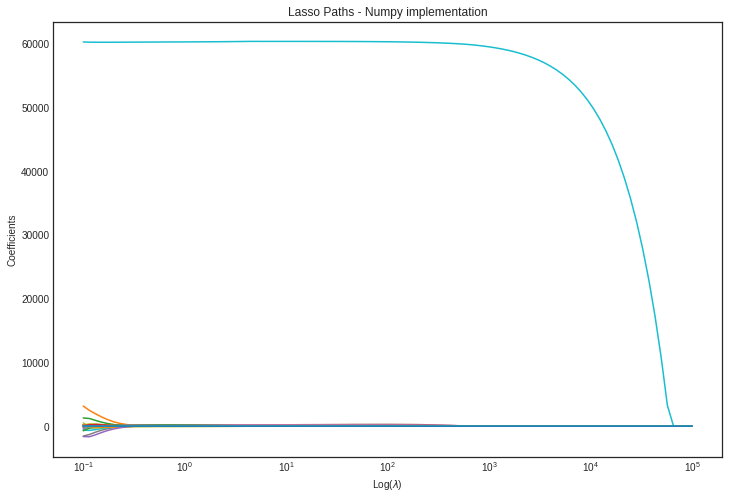

In [ ]:
%matplotlib inline
plt.style.use('seaborn-white')

def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''

    if rho < -lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    
def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    # Initialization of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            # predict y values by linear regression
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
            # thresholding
            theta[j] =  soft_threshold(rho, lamda)

    return theta.flatten()
  
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,6,100)/10 #Range of lambda values
#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i])
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')

zeros = []

# Loops through all the paths
for i in range(0, len(theta_lasso[0])):

  # Loops through the values in the path
  for j in range(0,len(theta_lasso)):

    # When the path equals zero and is not in the list add it to the list
    if theta_lasso[j][i] == 0:
      if not headers[j] in zeros:
        zeros.append(headers[j])

# Reverses the list to represent a hierarchy of importance in descending order
zeros.reverse()
print(zeros)

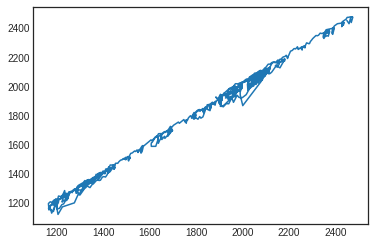

In [ ]:
# From Lasso Regression, Plots the most important feature
temp = data['EMA_10']
plt.plot(temp,y)

##**Problem #5: Data Processing 2**
Using the same data set, the dates were converted into the days of week (Sunday - Saturday). Then I looped through the dates and searched for complete weeks (Monday - Friday) so that we could use Monday-Thursday to predict Friday. If a week was complete, then the fridays were set as the target and the rest of the days were appeneded to the data matrix. From Lasso regression, important features were determined and then used for increasing accuracy.

In [ ]:
# Initializes matrix X and vector y for problems #5 and #6 and creates days of week list
X2=[]
y2=[]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Loops through all the dates in the dataframe
for i in range(0,len(data_2['Date'])-4):
  isCompleteWeek = True

  # Loops through all the days in the week
  for k in range(0, len(days)):

    # Checks if all days occur in sequence
    if data_2['Date'].iloc[i+k] != days[k]:
      isCompleteWeek = False
      break;

  # If all dates occur in the week, allocates Monday-Thursday to X2 and Friday to y2
  if isCompleteWeek:
    X2.append(data_2.drop(columns=headers2).iloc[i:i+4])
    y2.append(data_2.iloc[i+5]['Close'])

# Converts Lists into numpy arrays
X2 = np.asarray(X2)
y2 = np.asarray(y2)

##**Problem #6: Predicting Fridays**

Uses Linear regression and kernel ridge regression with a radial basis function. Using the data processed in part 5, the data was then reshaped so that every data point that represented Monday - Thursday had exactly one output which was a friday. This was then run through the regression models so that predictions could be computed and compared to the true values. The data that was used did not include most of the initial data from Processed_S&P because the extra datapoints (Monday - Thursday) would most likely overfit the data.

Training Metrics
The r^2 score is 0.9990018830519662
The mean squared error on the training set is 141.4415336683717
The mean absolute error on the training set is 9.392052109701396


Testing Metrics
The r^2 score is 0.9934052176309037
The mean squared error on the test set is 656.1022756309123
The mean absolute error on the test set is 21.27777886464527




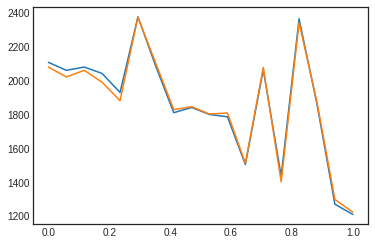

In [ ]:
# Initializes Linear Regression
model = LinearRegression()

# Randomly splits the data in an 80/20 split
(trainX, testX, trainY, testY) = train_test_split(X2, y2, test_size=0.2, random_state=1)

# Flattens the training and testing data so that each data point (Monday-Thursday) goes to one target value (Friday)
trainX = trainX.reshape((len(trainX),len(trainX[0][0])*len(trainX[0])))
testX = testX.reshape((len(testX), len(testX[0][0])*len(testX[0])))

# Uses the training data to determine theta parameters that minimize error
model.fit(trainX, trainY)

# Uses the fitted model to predict the training and testing outputs
trainPredictions = model.predict(trainX)
predictions = model.predict(testX)


print("Training Metrics")
# print the coefficient of determination r^2 for the training set
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics for training set
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

print(f"\n")
print("Testing Metrics")
# print the coefficient of determination r^2 for the testing set
print('The r^2 score is', r2_score(testY, predictions))

# print quality metrics for testing set
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
print(f"\n")

v = np.linspace(0,1,len(predictions))

# Test predictions in blue and true close in orange
plt.plot(v,predictions)
plt.plot(v,testY)

Training Metrics
The r^2 score is 0.9990270038727983
The mean squared error on the training set is 137.8817028965516
The mean absolute error on the training set is 9.541476400187658


Testing Metrics
The r^2 score is 0.993726822819337
The mean squared error on the test set is 624.1063909790437
The mean absolute error on the test set is 19.4163549391719




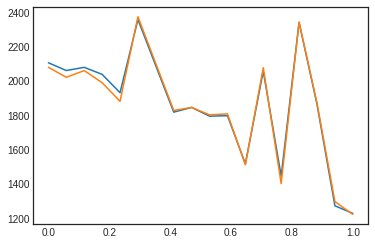

In [ ]:
# Initializes a radial basis function with lambda equal to 1215
kernel = RBF(1215)

# Calls and initializes the kernelridge class with regularization strength
model = KernelRidge(alpha = .0001, kernel = kernel)

# Randomly splits the data in an 80/20 split
(trainX, testX, trainY, testY) = train_test_split(X2, y2, test_size=0.2, random_state=1)

# Flattens the training and testing data so that each data point (Monday-Thursday) goes to one target value (Friday)
trainX = trainX.reshape((len(trainX),len(trainX[0][0])*len(trainX[0])))
testX = testX.reshape((len(testX), len(testX[0][0])*len(testX[0])))

# Uses the training data to determine theta parameters that minimize error
model.fit(trainX, trainY.ravel())

# Uses the fitted model to predict the training and testing outputs
trainPredictions = model.predict(trainX)
predictions = model.predict(testX)

print("Training Metrics")
# print the coefficient of determination r^2 for the training set
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics for training set
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

print(f"\n")
print("Testing Metrics")
# print the coefficient of determination r^2 for the testing set
print('The r^2 score is', r2_score(testY, predictions))

# print quality metrics for testing set
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
print(f"\n")
v = np.linspace(0,1,len(predictions))

# Test predictions in blue and true close in orange
plt.plot(v,predictions)
plt.plot(v,testY)